In [1]:
import nest_asyncio
import asyncio
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright
import pandas as pd
import numpy as np
import urllib.request as req
from bs4 import BeautifulSoup


將中職近年來洋將歷年抽出，觀察資料
步驟:
(1)觀察中職表現五邊形
(2)觀察往年在美國職棒之表現
(3)決定出未來中職找洋將之策略

step1:觀察中職表現雷達圖(SO%, BA, SLG, OBP, OPS)
(1)福來喜
(2)魔鷹
(3)卡洛斯
(4)谷德溫
(5)羅薩RR
(6)鈦龍
(7)羅薩WR
(8)霸帝士

In [2]:
def foreign_player(name):
    data=pd.read_csv(fr"C:\Users\kyo55\Desktop\野球革命分析賽\project\中值洋打csv\{name}.csv")
    #自行新增SO%代替SO
    data['SO%']=((data['SO']/data['PA'])).round(2)
    data=data.drop(columns='SO')
    return data
    
def clean_data(Name): #將數據清乾淨，處理NAN和 inf
    Name['Age']=pd.to_numeric(Name['Age'],errors='coerce')
    return Name.dropna(subset=['Age'])

#繪圖前資料預處理
Francisco=foreign_player('Francisco')
data_Francisco=Francisco[Francisco['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Moya=foreign_player('moya')
data_Moya=Moya[Moya['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Carlos=foreign_player('carlos')
data_Carlos=Carlos[Carlos['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Goodwin=foreign_player('goodwin')
data_Goodwin=Goodwin[Goodwin['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Rainel=foreign_player('rainel')
data_Rainel=Rainel[Rainel['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Telvin=foreign_player('telvin')
data_Telvin=Telvin[Telvin['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Wilin=foreign_player('wilin')
data_Wilin=Wilin[Wilin['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])

Xavier=foreign_player('xavier')
data_Xavier=Xavier[Xavier['Year']=='Mino'].drop(columns=['Year','Age','Tm','Lg','Lev','Aff','G','PA','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','TB','GDP','HBP','SH','SF','IBB'])



cpbl_playerdata=pd.concat([data_Francisco , data_Moya, data_Carlos, data_Goodwin, data_Rainel, data_Telvin, data_Wilin, data_Xavier], axis=0, ignore_index=True)

cpbl_playerdata['Player']=['Francisco' , 'Moya', 'Carlos', 'Goodwin', 'Rainel', 'Telvin', 'Wilin', 'Xavier']
#把Player放到第一column
player_col=cpbl_playerdata.pop('Player')
cpbl_playerdata.insert(0, 'PLAYER', player_col)
cpbl_playerdata

,PLAYER,BA,OBP,SLG,OPS,SO%
0,Francisco,0.245,0.296,0.402,0.698,0.18
1,Moya,0.249,0.292,0.445,0.737,0.29
2,Carlos,0.244,0.326,0.364,0.690,0.24
3,Goodwin,0.252,0.341,0.400,0.742,0.23
4,Rainel,0.246,0.323,0.366,0.689,0.22
5,Telvin,0.240,0.341,0.479,0.820,0.35
6,Wilin,0.276,0.322,0.466,0.788,0.21
7,Xavier,0.232,0.324,0.390,0.714,0.28


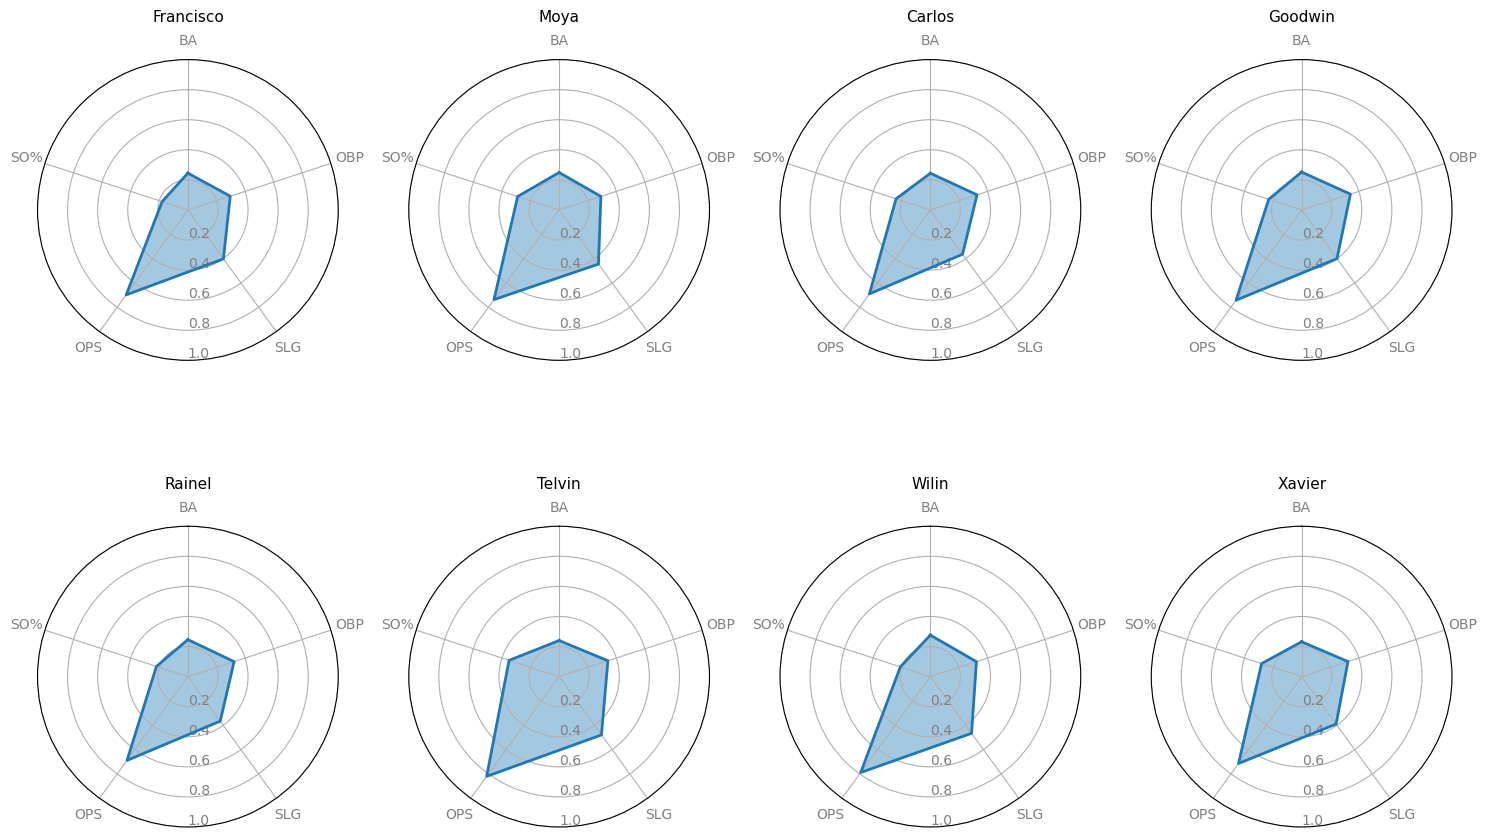

In [3]:
#創建雷達圖(spider)
import matplotlib.pyplot as plt
from math import pi 

# 设置变量类别
categories = list(cpbl_playerdata.columns[1:])
N = len(categories)

# 设置每个点的角度值
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 创建图形和子图
plt.figure(figsize=(15, 10))

# 循环创建每个 Player 的雷达图
for i in range(len(cpbl_playerdata)):
    ax = plt.subplot(2, 4, i+1, polar=True)
    
    # 如果需要第一个轴在顶部，可以设置角度偏移
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # 设置每个变量的标签
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
    # 设置 y 轴标签
    ax.set_rlabel_position(180)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    
    # 获取当前 Player 的数据并绘制
    values = cpbl_playerdata.iloc[i].drop('PLAYER').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
    # 设置标题
    plt.title(cpbl_playerdata['PLAYER'][i], size=11, color='black', y=1.1)

# 调整布局
plt.tight_layout()
plt.show()

從雷達圖可以發現，在台灣打得特別好魔鷹和其他人的圖形沒有非常明顯的區別。甚至三振率0.29還高於其他人。所以從一些基本數據不太能了解他的優勢。
不過也可以觀察到中華職棒目前有找過的洋將偏好都是差不多類型的打者。
接下來便去觀察一些打著的進階數據，如本壘板紀律、擊球的質量，但這些數據目前只有上過大聯盟的球員可以查的到(Goodwin, Moya, Francisco, Wilin)。

進階打擊數據又分為(1)Statcast Batting Statistics (2)Batted Ball Profile  (3)Plate Discipline 需要分別視覺畫觀察

In [4]:
#爬取進階打擊資料
import urllib.request as req



def Statcast_Batting_Statistics(url):
    request=req.Request(url, headers={
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'
    })
    with req.urlopen(request) as response:
        data=response.read().decode('utf-8')
    
    roots=BeautifulSoup(data, 'html.parser')
    data_html=roots.find('div', id='statcast_glance_batter')
    header=[header.get_text(strip=True) for header in data_html.find_all("th")]
    
    content=[]
    for i in data_html.find_all('td'):
        content.append(i.get_text(strip=True))
    
    array_content = np.array(content).reshape(-1, len(header))
    return pd.DataFrame(array_content, columns=header)


url_Goodwin='https://baseballsavant.mlb.com/savant-player/brian-goodwin-571718?stats=statcast-r-hitting-mlb'
url_Moya='https://baseballsavant.mlb.com/savant-player/steven-moya-570615?stats=statcast-r-hitting-mlb'
url_Francisco='https://baseballsavant.mlb.com/savant-player/francisco-pena-506747?stats=statcast-r-hitting-mlb'
url_Wilin='https://baseballsavant.mlb.com/savant-player/wilin-rosario-501647?stats=statcast-r-hitting-mlb'

Goodwin_SBS=Statcast_Batting_Statistics(url_Goodwin)
Goodwin_SBS = Goodwin_SBS[Goodwin_SBS['Season'] == 'Player'].drop(['Season', 'Age', 'Pitches', 'BattedBalls', 'Barrels', 'Barrel %'], axis=1)

Moya_SBS=Statcast_Batting_Statistics(url_Moya)
Moya_SBS = Moya_SBS[Moya_SBS['Season'] == 'Player'].drop(['Season', 'Age', 'Pitches', 'BattedBalls', 'Barrels', 'Barrel %'], axis=1)

Francisco_SBS=Statcast_Batting_Statistics(url_Francisco)
Francisco_SBS = Francisco_SBS[Francisco_SBS['Season'] == 'Player'].drop(['Season', 'Age', 'Pitches', 'BattedBalls', 'Barrels', 'Barrel %'], axis=1)

Wilin_SBS=Statcast_Batting_Statistics(url_Wilin)
Wilin_SBS = Wilin_SBS[Wilin_SBS['Season'] == 'Player'].drop(['Season', 'Age', 'Pitches', 'BattedBalls', 'Barrels', 'Barrel %'], axis=1)

MLBaverage_SBS=Statcast_Batting_Statistics(url_Wilin)
MLBaverage_SBS = MLBaverage_SBS[MLBaverage_SBS['Season'] == 'MLB'].drop(['Season', 'Age', 'Pitches', 'BattedBalls', 'Barrels', 'Barrel %'], axis=1)

player_SBS=pd.concat([Goodwin_SBS,Moya_SBS,Francisco_SBS,Wilin_SBS,MLBaverage_SBS], ignore_index=True)
player_SBS['Player']=['Goodwin', 'Moya', 'Francisco', 'Wilin', 'MLB AVG']
player_col=player_SBS.pop('Player')
player_SBS.insert(0, 'PLAYER', player_col)

player_SBS



,PLAYER,Barrel/PA,ExitVelocity,Max EV,LaunchAngle,LA Sweet-Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
0,Goodwin,4.7,88.3,111.4,16.3,37.1,.235,.407,.322,.312,.391,35.4,27.3,9.2
1,Moya,4.8,92.0,113.0,15.4,39.1,.216,.382,.315,.278,.425,40.6,38.4,6.4
2,Francisco,3.0,85.7,110.2,7.5,26.2,.185,.282,.237,.218,.304,27.7,31.2,4.0
3,Wilin,3.3,88.3,113.8,5.8,26.0,.231,.354,.303,.269,.340,33.9,23.1,3.3
4,MLB AVG,4.8,88.5,122.4,12.3,33.2,.245,.406,.316,.315,.369,36.5,22.2,8.4


為了繪製成雷達圖，將未分布在0-1之間的都*

In [5]:
from sklearn.preprocessing import MinMaxScaler

non_pros_col=player_SBS[['PLAYER']]
prepros_col=player_SBS.drop(['PLAYER'], axis=1)

scaler=MinMaxScaler()
scaler_values=scaler.fit_transform(prepros_col)

scaler_data=pd.DataFrame(scaler_values, columns=prepros_col.columns)
player_SBS=pd.concat([non_pros_col, scaler_data], axis=1)

player_SBS

,PLAYER,Barrel/PA,ExitVelocity,Max EV,LaunchAngle,LA Sweet-Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
0,Goodwin,0.944444,0.412698,0.098361,1.000000,0.847328,0.833333,1.000,1.000000,0.969072,0.719008,0.596899,0.314815,1.000000
1,Moya,1.000000,1.000000,0.229508,0.914286,1.000000,0.516667,0.800,0.917647,0.618557,1.000000,1.000000,1.000000,0.525424
2,Francisco,0.000000,0.000000,0.000000,0.161905,0.015267,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.555556,0.118644
3,Wilin,0.166667,0.412698,0.295082,0.000000,0.000000,0.766667,0.576,0.776471,0.525773,0.297521,0.480620,0.055556,0.000000
4,MLB AVG,1.000000,0.444444,1.000000,0.619048,0.549618,1.000000,0.992,0.929412,1.000000,0.537190,0.682171,0.000000,0.864407


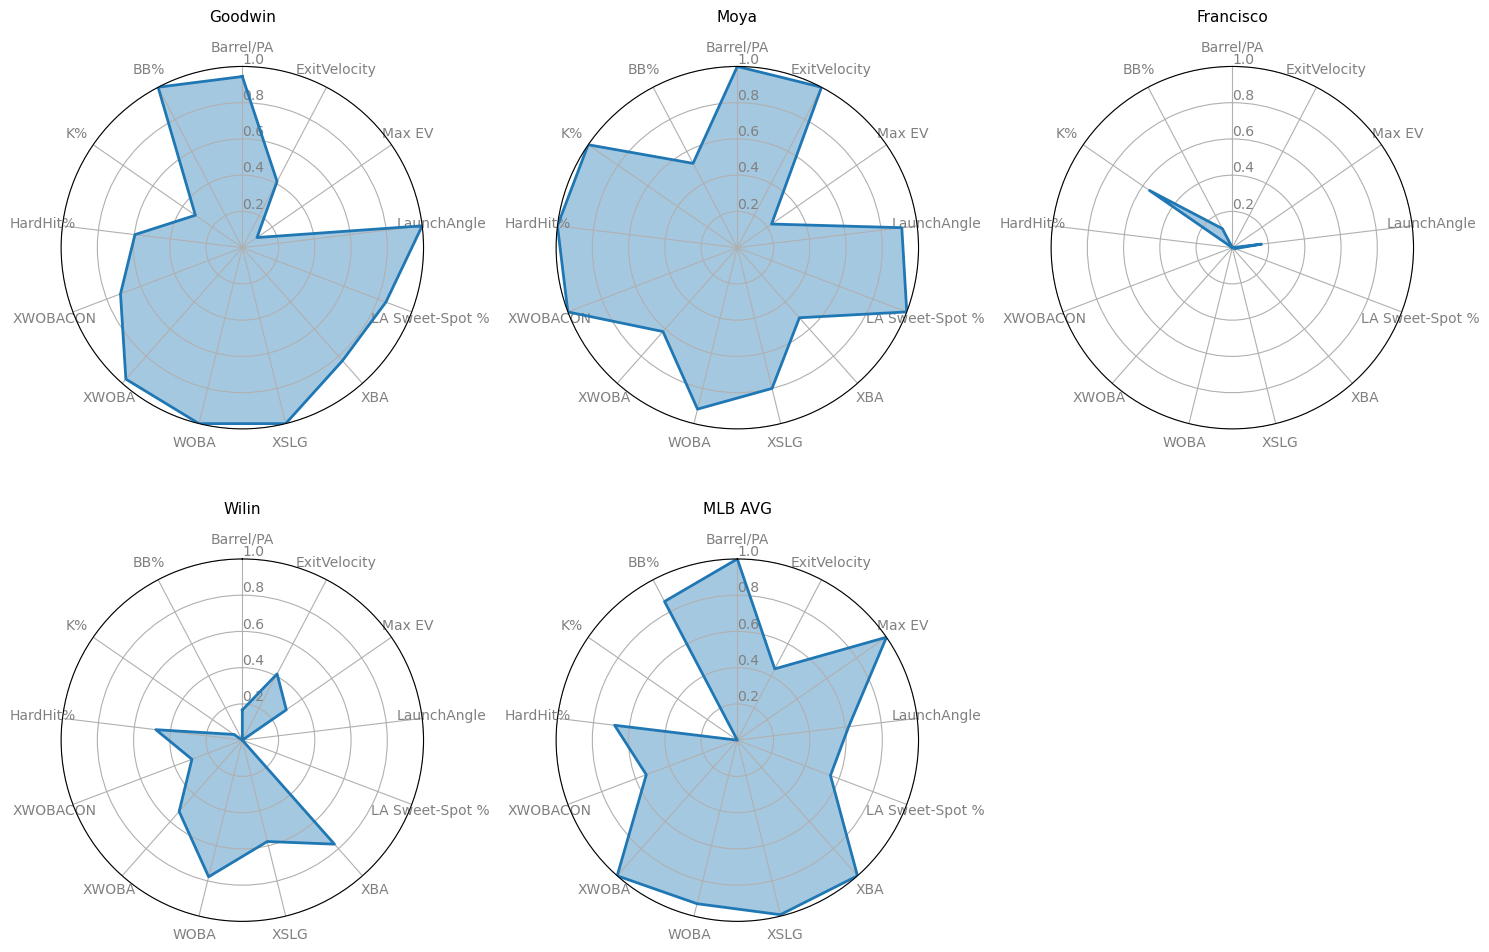

In [6]:
#開始畫雷達圖

import numpy as np
import matplotlib.pyplot as plt
from math import pi


categories = list(player_SBS.columns[1:])  # 不包括 'PLAYER'
N = len(categories)


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


plt.figure(figsize=(15, 10))


for i in range(len(player_SBS)):
    ax = plt.subplot(2, 3, i+1, polar=True)
    
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
  
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    
   
    values = player_SBS.iloc[i].drop('PLAYER').values.flatten().tolist()
    values += values[:1]  # 闭合雷达图
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
   
    plt.title(player_SBS['PLAYER'][i], size=11, color='black', y=1.1)


plt.tight_layout()
plt.show()


可以明顯看到魔鷹的三振率偏高，但是他的擊球後加權上壘率(XWOBACON)，Barrel/PA, 擊球初速，擊球仰角(15度)，甜蜜點擊球和hard hit%都高於聯盟平均，所以即使常被三振，但一旦被打到，就會非常有效。

In [8]:
url='https://baseballsavant.mlb.com/savant-player/brian-goodwin-571718?stats=statcast-r-hitting-mlb'
request=req.Request(url, headers={
            'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'
        })
with req.urlopen(request) as response:
    data=response.read().decode('utf-8')
        
root=BeautifulSoup(data,'html.parser')
data_html=root.find_all('table', id='playeDiscipline')
    
Batted_Ball_Profile_html=data_html[0]
BBP_headers=[BBP_headers.get_text(strip=True) for BBP_headers in Batted_Ball_Profile_html.find_all('th')]
BBP_headers

['Season',
 'GB %',
 'FB %',
 'LD %',
 'PU %',
 'Pull %',
 'Straight %',
 'Oppo %',
 'Weak %',
 'Topped %',
 'Under %',
 'Flare/Burner %',
 'Solid %',
 'Barrel %',
 'Barrel/PA']

In [9]:
#抓取擊球數據資料

def Batted_Ball_Profile(url):
    request=req.Request(url, headers={
            'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'
        })
    with req.urlopen(request) as response:
        data=response.read().decode('utf-8')
    
    root=BeautifulSoup(data,'html.parser')
    data_html=root.find_all('table', id='playeDiscipline')
    
    Batted_Ball_Profile_html=data_html[0]
    
     #處理Batted Ball Profile
    BBP_headers=[BBP_headers.get_text(strip=True) for BBP_headers in Batted_Ball_Profile_html.find_all('th')]
    BBP_content=[]
    for i in Batted_Ball_Profile_html.find_all('td'):
        BBP_content.append(i.get_text(strip=True))
    array_BBP_content=np.array(BBP_content).reshape(-1, len(BBP_headers))
    BBP_dataframe=pd.DataFrame(array_BBP_content, columns=BBP_headers)
    return BBP_dataframe
    
url_Goodwin='https://baseballsavant.mlb.com/savant-player/brian-goodwin-571718?stats=statcast-r-hitting-mlb'
url_Moya='https://baseballsavant.mlb.com/savant-player/steven-moya-570615?stats=statcast-r-hitting-mlb'
url_Francisco='https://baseballsavant.mlb.com/savant-player/francisco-pena-506747?stats=statcast-r-hitting-mlb'
url_Wilin='https://baseballsavant.mlb.com/savant-player/wilin-rosario-501647?stats=statcast-r-hitting-mlb'

Goodwin_BBP=Batted_Ball_Profile(url_Goodwin)
Goodwin_BBP = Goodwin_BBP[Goodwin_BBP['Season'] == 'Player'].drop('Season',axis=1)
Goodwin_BBP

Moya_BBP=Batted_Ball_Profile(url_Moya)
Moya_BBP = Moya_BBP[Moya_BBP['Season'] == 'Player'].drop('Season',axis=1)

Francisco_BBP=Batted_Ball_Profile(url_Francisco)
Francisco_BBP = Francisco_BBP[Francisco_BBP['Season'] == 'Player'].drop('Season',axis=1)

Wilin_BBP=Batted_Ball_Profile(url_Wilin)
Wilin_BBP = Wilin_BBP[Wilin_BBP['Season'] == 'Player'].drop('Season',axis=1)

MLBaverage_BBP=Batted_Ball_Profile(url_Wilin)
MLBaverage_BBP = MLBaverage_BBP[MLBaverage_BBP['Season'] == 'MLB'].drop('Season',axis=1)



player_BBP=pd.concat([Goodwin_BBP, Moya_BBP, Francisco_BBP, Wilin_BBP, MLBaverage_BBP], ignore_index=True)
player_BBP['Player']=['Goodwin', 'Moya', 'Francisco', 'Wilin', 'MLB AVG']
player_col=player_BBP.pop('Player')
player_BBP.insert(0, 'PLAYER', player_col)
player_BBP


,PLAYER,GB %,FB %,LD %,PU %,Pull %,Straight %,Oppo %,Weak %,Topped %,Under %,Flare/Burner %,Solid %,Barrel %,Barrel/PA
0,Goodwin,37.0,27.5,28.2,7.3,41.2,35.7,23.1,2.6,27.2,29.2,25.2,6.7,7.5,4.7
1,Moya,40.6,27.5,24.6,7.2,39.1,39.1,21.7,0.0,27.5,26.1,26.1,11.6,8.7,4.8
2,Francisco,56.2,15.4,20.0,8.5,41.5,38.5,20.0,1.5,43.1,20.8,24.6,1.5,4.6,3.0
3,Wilin,55.9,14.1,24.3,5.6,38.4,39.0,22.6,3.4,43.5,16.9,21.5,7.3,4.5,3.3
4,MLB AVG,44.5,23.7,24.8,7.0,37.1,37.5,25.2,3.9,32.7,24.8,24.4,5.8,7.0,4.8


In [10]:
non_pros_col=player_BBP[['PLAYER']]
prepros_col=player_BBP.drop(['PLAYER'], axis=1)

scaler=MinMaxScaler()
scaler_values=scaler.fit_transform(prepros_col)

scaler_data=pd.DataFrame(scaler_values, columns=prepros_col.columns)
player_BBP=pd.concat([non_pros_col, scaler_data], axis=1)

player_BBP

,PLAYER,GB %,FB %,LD %,PU %,Pull %,Straight %,Oppo %,Weak %,Topped %,Under %,Flare/Burner %,Solid %,Barrel %,Barrel/PA
0,Goodwin,0.000000,1.000000,1.000000,0.586207,0.931818,0.000000,0.596154,0.666667,0.000000,1.000000,0.804348,0.514851,0.714286,0.944444
1,Moya,0.187500,1.000000,0.560976,0.551724,0.454545,1.000000,0.326923,0.000000,0.018405,0.747967,1.000000,1.000000,1.000000,1.000000
2,Francisco,1.000000,0.097015,0.000000,1.000000,1.000000,0.823529,0.000000,0.384615,0.975460,0.317073,0.673913,0.000000,0.023810,0.000000
3,Wilin,0.984375,0.000000,0.524390,0.000000,0.295455,0.970588,0.500000,0.871795,1.000000,0.000000,0.000000,0.574257,0.000000,0.166667
4,MLB AVG,0.390625,0.716418,0.585366,0.482759,0.000000,0.529412,1.000000,1.000000,0.337423,0.642276,0.630435,0.425743,0.595238,1.000000


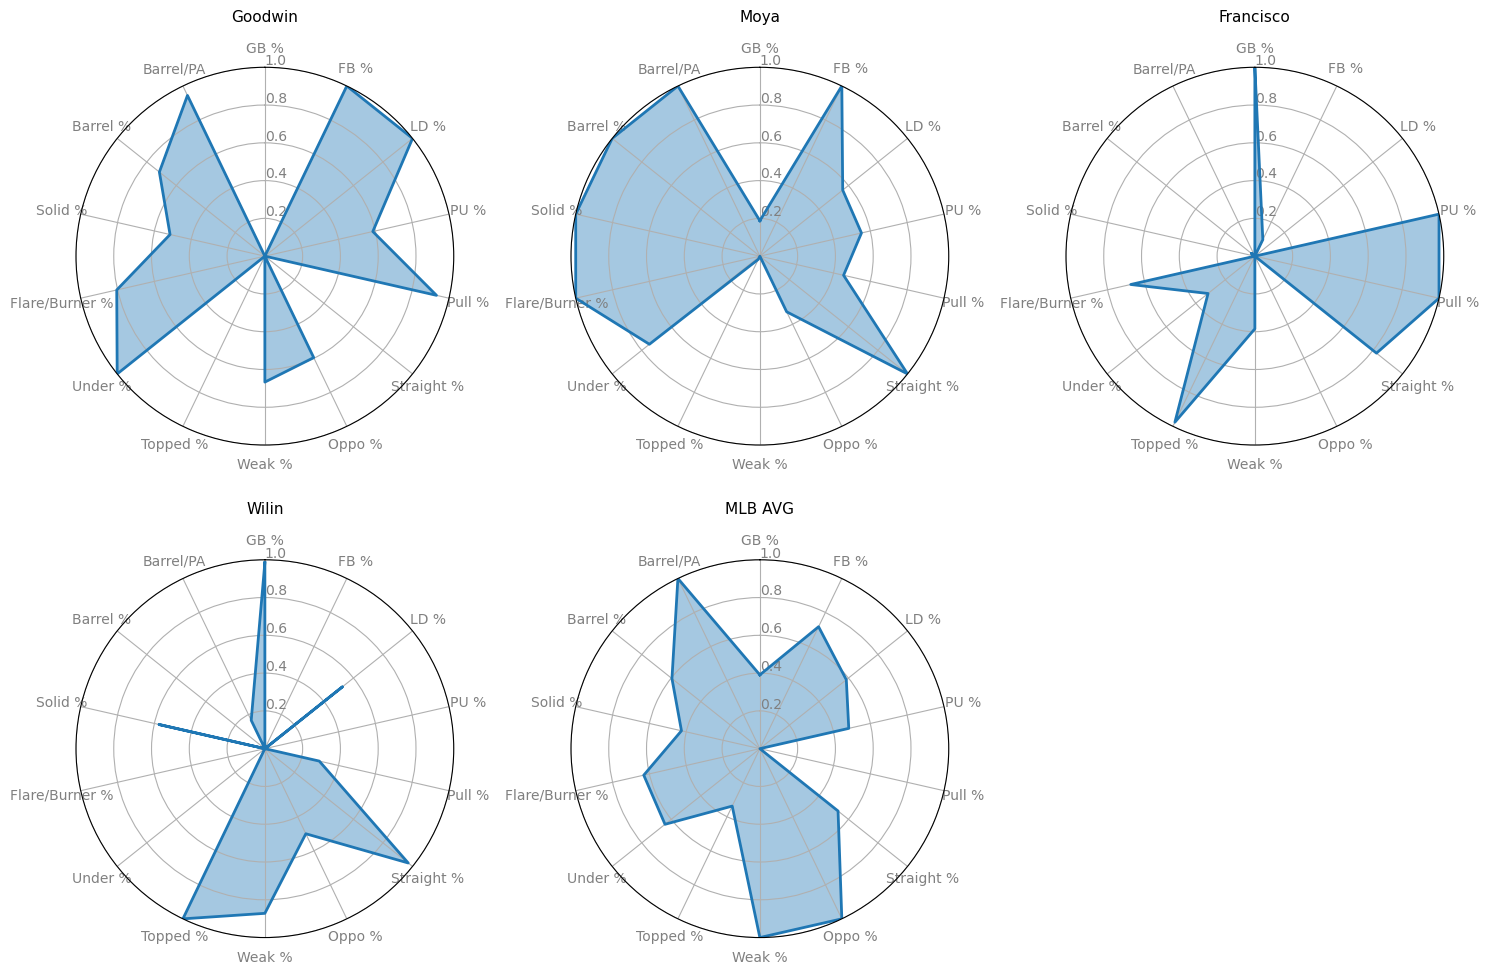

In [11]:
categories = list(player_BBP.columns[1:])  # 不包括 'PLAYER'
N = len(categories)


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


plt.figure(figsize=(15, 10))


for i in range(len(player_BBP)):
    ax = plt.subplot(2, 3, i+1, polar=True)
    
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
  
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    
   
    values = player_BBP.iloc[i].drop('PLAYER').values.flatten().tolist()
    values += values[:1]  # 闭合雷达图
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
   
    plt.title(player_BBP['PLAYER'][i], size=11, color='black', y=1.1)


plt.tight_layout()
plt.show()

In [12]:
#抓取本壘板紀律資料

def Plate_Discipline(url):
    request=req.Request(url, headers={
            'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36'
        })
    with req.urlopen(request) as response:
        data=response.read().decode('utf-8')
    
    root=BeautifulSoup(data,'html.parser')
    data_html=root.find_all('table', id='playeDiscipline')

    Plate_Discipline_html=data_html[1]
    #處理Plate Discipline
    PD_headers=[PD_headers.get_text(strip=True) for PD_headers in Plate_Discipline_html.find_all('th')]
    PD_content=[]
    for i in Plate_Discipline_html.find_all('td'):
        PD_content.append(i.get_text(strip=True))
    array_PD_content=np.array(PD_content).reshape(-1, len(PD_headers))
    return pd.DataFrame(array_PD_content, columns=PD_headers)

url_Goodwin='https://baseballsavant.mlb.com/savant-player/brian-goodwin-571718?stats=statcast-r-hitting-mlb'
url_Moya='https://baseballsavant.mlb.com/savant-player/steven-moya-570615?stats=statcast-r-hitting-mlb'
url_Francisco='https://baseballsavant.mlb.com/savant-player/francisco-pena-506747?stats=statcast-r-hitting-mlb'
url_Wilin='https://baseballsavant.mlb.com/savant-player/wilin-rosario-501647?stats=statcast-r-hitting-mlb'

Goodwin_DP=Plate_Discipline(url_Goodwin)
Goodwin_DP = Goodwin_DP[Goodwin_DP['Season'] == 'Player'].drop(['Season','Pitches'],axis=1)

Moya_DP=Plate_Discipline(url_Moya)
Moya_DP = Moya_DP[Moya_DP['Season'] == 'Player'].drop(['Season','Pitches'],axis=1)

Francisco_DP=Plate_Discipline(url_Francisco)
Francisco_DP = Francisco_DP[Francisco_DP['Season'] == 'Player'].drop(['Season','Pitches'],axis=1)

Wilin_DP=Plate_Discipline(url_Wilin)
Wilin_DP = Wilin_DP[Wilin_DP['Season'] == 'Player'].drop(['Season','Pitches'],axis=1)

MLBaverage_DP=Plate_Discipline(url_Wilin)
MLBaverage_DP = MLBaverage_DP[MLBaverage_DP['Season'] == 'MLB'].drop(['Season','Pitches'],axis=1)



player_DP=pd.concat([Goodwin_DP, Moya_DP, Francisco_DP, Wilin_DP, MLBaverage_DP], ignore_index=True)
player_DP['Player']=['Goodwin', 'Moya', 'Francisco', 'Wilin', 'MLB AVG']
player_col=player_DP.pop('Player')
player_DP.insert(0, 'PLAYER', player_col)
player_DP                 

,PLAYER,Zone %,Zone Swing %,Zone Contact %,Chase %,Chase Contact %,Edge %,1st Pitch Swing %,Swing %,Whiff %,Meatball %,Meatball Swing %
0,Goodwin,49.5,59.7,78.8,23.5,53.6,43.9,15.9,41.5,27.9,7.0,68.3
1,Moya,41.6,79.9,73.7,40.6,52.0,41.0,49.6,56.9,35.3,4.9,76.9
2,Francisco,50.9,70.8,82.8,46.2,52.7,43.2,39.3,58.7,28.1,6.7,83.7
3,Wilin,49.6,72.5,79.6,35.3,60.8,41.9,39.7,53.8,26.6,7.0,81.7
4,MLB AVG,48.6,67.0,82.0,28.5,57.8,42.6,29.8,47.2,24.8,7.3,76.3


In [13]:
non_pros_col=player_DP[['PLAYER']]
prepros_col=player_DP.drop(['PLAYER'], axis=1)

scaler=MinMaxScaler()
scaler_values=scaler.fit_transform(prepros_col)

scaler_data=pd.DataFrame(scaler_values, columns=prepros_col.columns)
player_DP=pd.concat([non_pros_col, scaler_data], axis=1)

player_DP

,PLAYER,Zone %,Zone Swing %,Zone Contact %,Chase %,Chase Contact %,Edge %,1st Pitch Swing %,Swing %,Whiff %,Meatball %,Meatball Swing %
0,Goodwin,0.849462,0.000000,0.560440,0.000000,0.181818,1.000000,0.000000,0.000000,0.295238,0.875,0.000000
1,Moya,0.000000,1.000000,0.000000,0.753304,0.000000,0.000000,1.000000,0.895349,1.000000,0.000,0.558442
2,Francisco,1.000000,0.549505,1.000000,1.000000,0.079545,0.758621,0.694362,1.000000,0.314286,0.750,1.000000
3,Wilin,0.860215,0.633663,0.648352,0.519824,1.000000,0.310345,0.706231,0.715116,0.171429,0.875,0.870130
4,MLB AVG,0.752688,0.361386,0.912088,0.220264,0.659091,0.551724,0.412463,0.331395,0.000000,1.000,0.519481


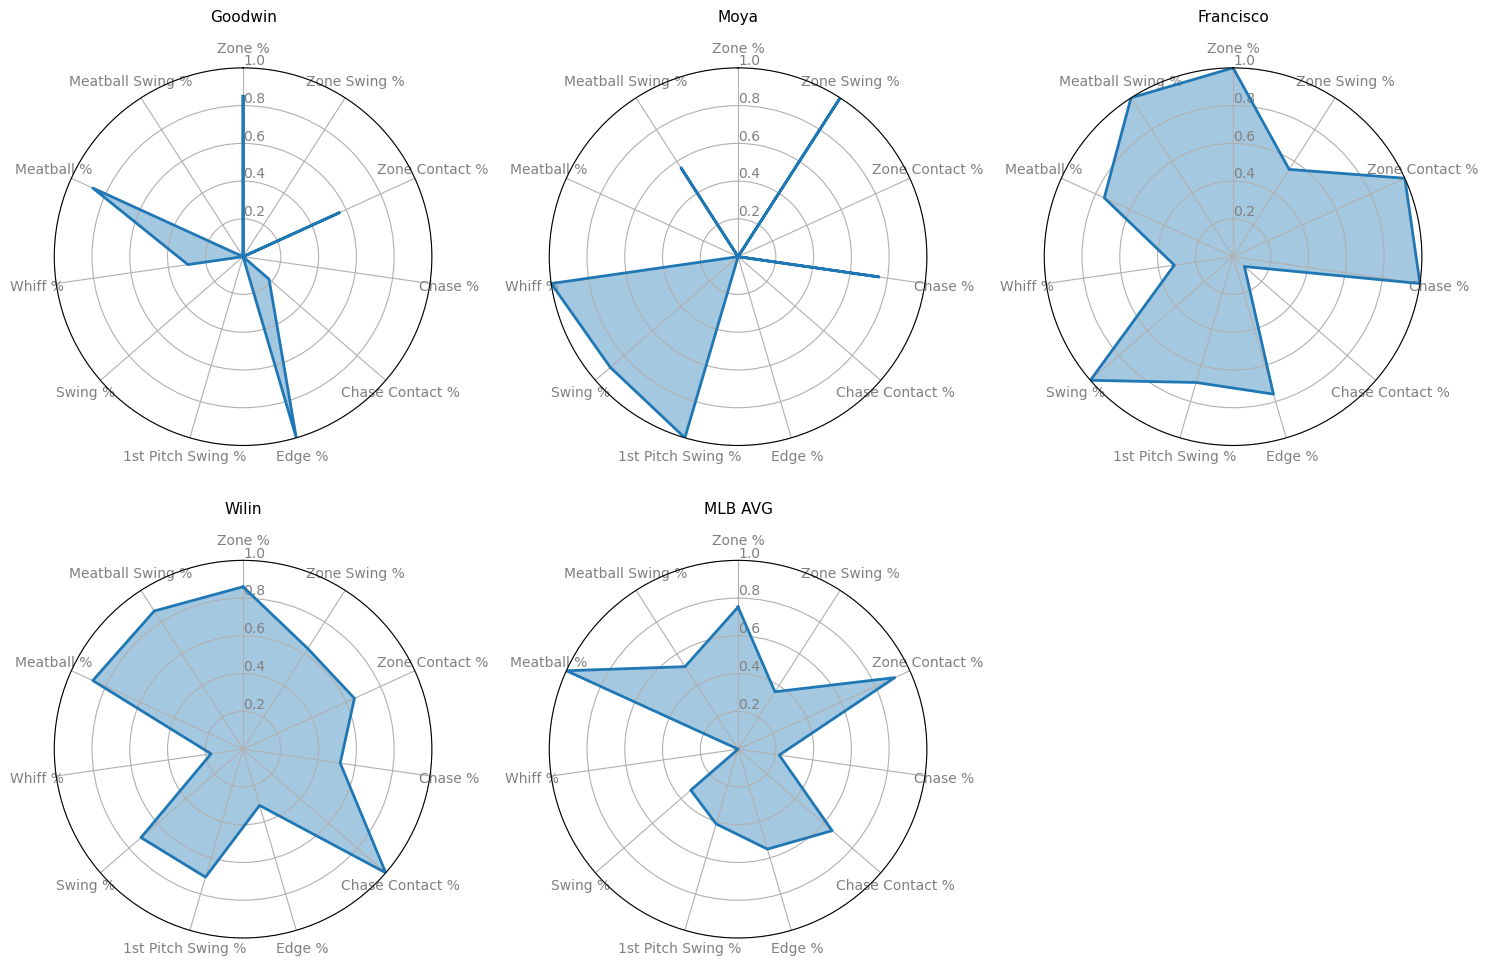

In [14]:
categories = list(player_DP.columns[1:])  # 不包括 'PLAYER'
N = len(categories)


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


plt.figure(figsize=(15, 10))


for i in range(len(player_DP)):
    ax = plt.subplot(2, 3, i+1, polar=True)
    
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
  
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)
    
   
    values = player_DP.iloc[i].drop('PLAYER').values.flatten().tolist()
    values += values[:1]  # 闭合雷达图
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
   
    plt.title(player_DP['PLAYER'][i], size=11, color='black', y=1.1)


plt.tight_layout()
plt.show()

In [15]:
#讀取從baseball savant上下載的球員數據csv

mlb_player_csv=pd.read_csv(fr"C:\Users\kyo55\Desktop\野球革命分析賽\project\mlb_player_2223stats.csv")
mlb_player=pd.DataFrame(mlb_player_csv).drop('player_id', axis=1)
PA_mask=mlb_player['pa']<=200
mlb_player=mlb_player[PA_mask]
mlb_player

,"last_name, first_name",year,player_age,pa,batting_avg,slg_percent,xwobacon,barrel_batted_rate,solidcontact_percent,flareburner_percent,hard_hit_percent,avg_best_speed,oz_swing_percent,oz_contact_percent,flyballs_percent
3,"Canó, Robinson",2022,39,104,0.150,0.190,0.293,4.0,4.0,22.7,41.3,100.261988,40.0,56.0,18.7
4,"Suzuki, Kurt",2022,38,159,0.180,0.295,0.255,3.5,7.1,20.4,26.5,95.157941,27.4,57.5,30.1
7,"Escobar, Alcides",2022,35,131,0.218,0.282,0.278,1.1,1.1,27.2,17.4,92.492630,36.6,63.3,20.7
12,"Cain, Lorenzo",2022,36,156,0.179,0.234,0.262,0.0,8.2,19.1,36.4,99.010785,32.2,55.0,15.5
15,"Upton, Justin",2022,34,57,0.125,0.208,0.318,4.0,0.0,32.0,32.0,99.128878,24.8,39.3,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,"Gonzales, Nick",2023,24,128,0.209,0.348,0.316,3.7,2.4,22.0,26.8,95.857528,28.3,42.0,23.2
1084,"Schanuel, Nolan",2023,21,132,0.275,0.330,0.338,2.2,2.2,31.1,25.6,94.380370,20.4,72.7,17.8
1085,"Carter, Evan",2023,20,75,0.306,0.645,0.451,10.3,10.3,30.8,46.2,100.917655,9.0,26.7,15.4
1086,"Goodman, Hunter",2023,23,77,0.200,0.386,0.350,10.4,10.4,18.8,43.8,101.797267,35.6,38.6,29.2


In [16]:
#觀察表個的每項基本數據
#mlb_player.info()
mlb_player.iloc[:,4:].describe()

,batting_avg,slg_percent,xwobacon,barrel_batted_rate,solidcontact_percent,flareburner_percent,hard_hit_percent,avg_best_speed,oz_swing_percent,oz_contact_percent,flyballs_percent
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.212898,0.333156,0.338739,6.175202,5.535040,23.314016,34.209973,98.100576,29.587601,52.203774,25.025337
std,0.048286,0.092252,0.056682,4.444831,3.135044,5.729621,9.292632,2.596852,7.241006,12.163474,7.006264
min,0.075000,0.075000,0.186000,0.000000,0.000000,8.100000,9.000000,88.340397,9.000000,16.700000,3.100000
25%,0.180000,0.277000,0.297500,2.900000,3.200000,19.800000,27.750000,96.313379,24.800000,42.950000,20.000000
50%,0.213000,0.325000,0.337000,5.800000,5.400000,23.300000,34.600000,98.190953,29.200000,52.600000,25.000000
75%,0.243000,0.385500,0.373000,8.600000,7.450000,27.150000,40.350000,99.760041,33.900000,60.600000,29.700000
max,0.400000,0.727000,0.563000,31.600000,21.900000,43.200000,59.200000,105.673861,51.800000,83.300000,49.100000


<div>
1.PA在50-200之間：確保該球員有一定上場機會<br>
2.長打率和打擊率保持在平均水準附近：確保有基本能力<br>
3.XWOBACON高：表示擊球的力道和仰角都不錯<br>
4.Barrel/PA高：表示有效打擊機率高<br>
5.Out of zone swing%和Out of zone contact同時高：表示能有效追打壞球<br>
6.Solid contact%和Hard hit%也能觀察，但相當於包含在XWOBACON裡面
</div>


In [29]:
#建立篩選mask,找出各項都有25%以上水準的球員
avg_mask=mlb_player['batting_avg']>=0.18
slg_mask=mlb_player['slg_percent']>=0.277
xwobacon_mask=mlb_player['xwobacon']>=0.2975
barrel_mask=mlb_player['barrel_batted_rate']>=2.9
outzone_mask=(mlb_player['oz_swing_percent']>=24.8)&(mlb_player['oz_contact_percent']>=42.95)
combined_mask = avg_mask & slg_mask & xwobacon_mask & barrel_mask & outzone_mask

In [30]:
mlb_player=mlb_player[combined_mask]
sorted_mlb_player=mlb_player.sort_values(by='batting_avg', ascending=False)
sorted_mlb_player

,"last_name, first_name",year,player_age,pa,batting_avg,slg_percent,xwobacon,barrel_batted_rate,solidcontact_percent,flareburner_percent,hard_hit_percent,avg_best_speed,oz_swing_percent,oz_contact_percent,flyballs_percent,distance
940,"Campusano, Luis",2023,24,174,0.319,0.491,0.380,7.7,5.6,34.3,40.6,98.855264,35.5,73.1,21.0,21.730670
498,"Moreno, Gabriel",2022,22,73,0.319,0.377,0.313,3.3,0.0,24.6,32.8,97.748776,30.8,63.9,14.8,16.334704
382,"Stephenson, Tyler",2022,25,183,0.319,0.482,0.395,6.6,7.4,29.8,34.7,97.521470,25.1,50.0,18.2,15.768985
1016,"Abreu, Wilyer",2023,24,85,0.316,0.474,0.456,9.4,7.5,30.2,49.1,102.696284,25.1,51.1,30.2,15.541910
1051,"Marte, Noelvi",2023,21,123,0.316,0.456,0.399,7.9,3.4,28.1,46.1,102.585447,28.6,51.6,19.1,12.033315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,"Wong, Connor",2022,26,56,0.188,0.313,0.336,11.8,2.9,8.8,32.4,99.758805,33.9,46.2,17.6,9.388712
996,"Smith, Kevin",2023,26,146,0.185,0.326,0.347,9.0,10.1,14.6,36.0,99.217505,42.3,49.1,32.6,3.375809
834,"Yepez, Juan",2023,25,65,0.183,0.300,0.396,7.5,2.5,30.0,25.0,95.107661,35.7,60.8,25.0,10.143512
754,"Dozier, Hunter",2023,31,91,0.183,0.305,0.303,3.7,3.7,22.2,38.9,98.375984,28.9,43.6,25.9,15.246799


利用魔鷹數據(1)AVG.=0.249(
)SLG.=0.445)(3XWOBCON=0.425)(4Barrel%=8.7)(5ozS%=40.6)(6ozC%=52，來計算和其他球員的歐氏距離
最後畫散點圖)

In [31]:
moya_data = {
    'batting_avg': 0.249,
    'slg_percent': 0.445,
    'xwobacon': 0.425,
    'barrel_batted_rate': 8.7,
    'oz_swing_percent': 40.6,
    'oz_contact_percent': 52
}

def calculate_distance(row, sample):
    return np.sqrt(
        (row['xwobacon'] - sample['xwobacon'])**2 +
        (row['barrel_batted_rate'] - sample['barrel_batted_rate'])**2 +
        (row['oz_swing_percent'] - sample['oz_swing_percent'])**2 +
        (row['oz_contact_percent'] - sample['oz_contact_percent'])**2
    )

#修正 應該講avg, slg 刪除，因為中直找來的打擊三圍都差不多
sorted_mlb_player['distance'] = sorted_mlb_player.apply(calculate_distance, axis=1, sample=moya_data)
sorted_mlb_player.sort_values(by='distance', ascending=True)
sorted_mlb_player

,"last_name, first_name",year,player_age,pa,batting_avg,slg_percent,xwobacon,barrel_batted_rate,solidcontact_percent,flareburner_percent,hard_hit_percent,avg_best_speed,oz_swing_percent,oz_contact_percent,flyballs_percent,distance
940,"Campusano, Luis",2023,24,174,0.319,0.491,0.380,7.7,5.6,34.3,40.6,98.855264,35.5,73.1,21.0,21.730670
498,"Moreno, Gabriel",2022,22,73,0.319,0.377,0.313,3.3,0.0,24.6,32.8,97.748776,30.8,63.9,14.8,16.334704
382,"Stephenson, Tyler",2022,25,183,0.319,0.482,0.395,6.6,7.4,29.8,34.7,97.521470,25.1,50.0,18.2,15.768985
1016,"Abreu, Wilyer",2023,24,85,0.316,0.474,0.456,9.4,7.5,30.2,49.1,102.696284,25.1,51.1,30.2,15.541910
1051,"Marte, Noelvi",2023,21,123,0.316,0.456,0.399,7.9,3.4,28.1,46.1,102.585447,28.6,51.6,19.1,12.033315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,"Wong, Connor",2022,26,56,0.188,0.313,0.336,11.8,2.9,8.8,32.4,99.758805,33.9,46.2,17.6,9.388712
996,"Smith, Kevin",2023,26,146,0.185,0.326,0.347,9.0,10.1,14.6,36.0,99.217505,42.3,49.1,32.6,3.375809
834,"Yepez, Juan",2023,25,65,0.183,0.300,0.396,7.5,2.5,30.0,25.0,95.107661,35.7,60.8,25.0,10.143512
754,"Dozier, Hunter",2023,31,91,0.183,0.305,0.303,3.7,3.7,22.2,38.9,98.375984,28.9,43.6,25.9,15.246799


In [32]:
sorted_mlb_player.to_excel('MLBplayer_distance.xlsx', index=False)

In [35]:
statistic101=sorted_mlb_player.iloc[:,4:].describe()
statistic101.to_excel('statistics.xlsx')